# After the introductive slides on Xspec... let's try to interactively work with PyXspec now, starting from this template...

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
from astropy.table import  Table
def print_model(m):
    _comp = []
    _name = []
    _val = []
    _unit = []
    _err = []
    _step = []
    _min = []
    _max = []
    _froz = []
    colnames = ['component', 'par name', 'value', 'units', 'error', 'step', 'min', 'max', 'frozen']
    for model_name in m.componentNames:
        fit_model = getattr(m, model_name)
        for name in fit_model.parameterNames:
            p = getattr(fit_model, name)
            _comp.append('%s' % (model_name))
            _name.append('%s' % (p.name))
            _val.append('%5.4f' % p.values[0])
            _unit.append('%s' % p.unit)
            _err.append('%5.4f' % p.sigma)
            _step.append('%5.4f' % p.values[1])
            _min.append('%5.2e' % p.values[2])
            _max.append('%5.2e' % p.values[4])
            _froz.append('%s' % p.frozen)

    t=Table([_comp, _name, _val, _unit, _err, _step, _min, _max, _froz],names=colnames)
    print(t)

In [3]:
import shutil
from IPython.display import Image
from IPython.display import display 
def plot_spectrum(what = "euf del", units = "keV", minSig=0, maxBins=1, command = ""):
    '''
    Possible unit formats are: "channel", "MeV", "Hz", "angstrom"
    rebin: minSig, maxBins, groupNum, errType 
    '''
#    xsp.Plot.addCommand("setplot delete all")
#    xsp.Plot.commands = ()
    xsp.Plot.device="/png"
    xsp.Plot.xAxis=units
    xsp.Plot.background = True
    xsp.Plot.setRebin(minSig=minSig, maxBins=maxBins)#, groupNum=1, errType="quad") #DOES NOT WORK
    if command:
        xsp.Plot.addCommand(command)    
    xsp.Plot(what)

    #xspec.Plot.addCommand("setplot en")
#    xsp.Plot.xLog = False
#    xsp.Plot.yLog = False
#    xsp.Plot("ufspec")
#    xsp.Plot("data")
#    xsp.Plot("model")
#    xsp.Plot("data chisq")
#    xsp.Plot("data","model","resid")

#    xsp.Plot.setRebin(minSig=10, maxBins=30, groupNum=1, errType="quad") #DOES NOT WORK
#    if bool(rebin):
#        print rebin
#        xsp.Plot.addCommand("setPlot rebin %s" % (rebin))
#    else:
#        print "no rebin"
#        xsp.Plot.addCommand("setplot delete all")
#        xsp.Plot.commands = ()
#    print xsp.Plot.commands

    xsp.Plot.device="/png"

    fn="test.png"


    shutil.move("pgplot.png_2", fn)

    _=display(Image(filename=fn,format="png"))
    
    return xsp.Plot

In [4]:
def get_stats():
    chi2_red=xsp.Fit.statistic/xsp.Fit.dof
    chi2=xsp.Fit.statistic
    ndof=xsp.Fit.dof
    
    return chi2_red, chi2, ndof

In [5]:
from future import *
import pprint
import xspec as xsp

In [6]:
xsp.Xset.allowPrompting 
xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

# Load the spectrum file
s = xsp.Spectrum('data/spec.fits')
# Load the response file (Energy vs. channels)
s.response = 'data/rmf.fits'
# Load the arf file (Effective Area vs. Energy)
s.response.arf = 'data/arf.fits'

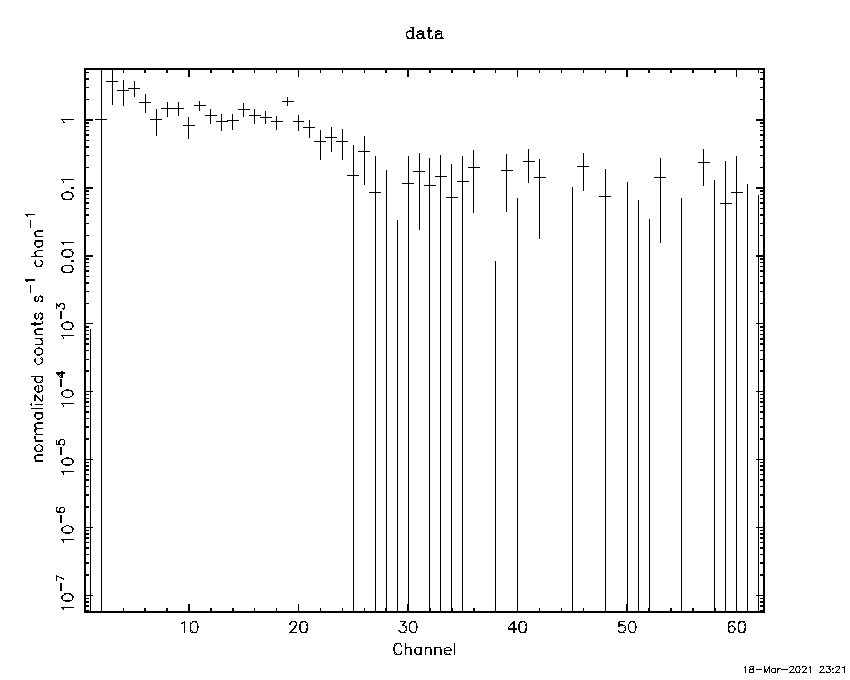

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62]

In [7]:
s.notice('all')
plot_spectrum(what='ldata', units='ch')
s.noticed

In [8]:
xsp.AllData.ignore('bad')
s.noticed

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62]

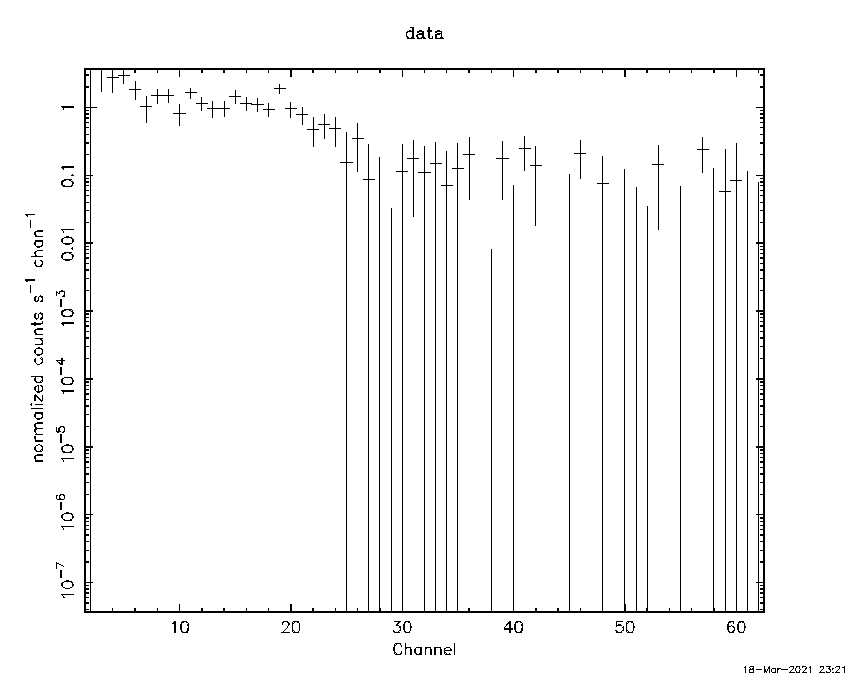

In [9]:
plot_spectrum(what='ldata', units='ch')

In [10]:
s.ignore('**-2')
s.ignore('60-**')

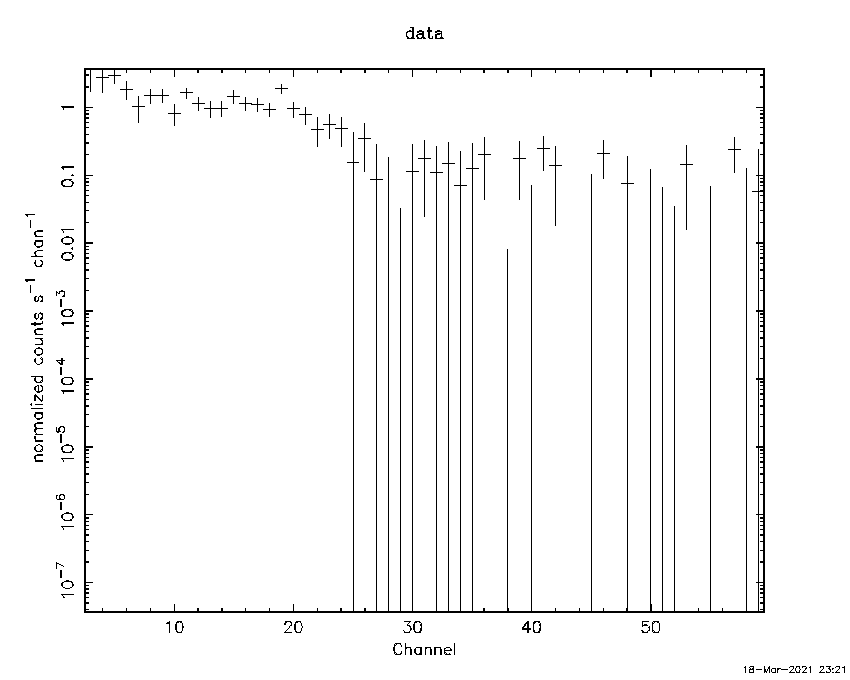

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [11]:
plot_spectrum(what='ldata', units='ch')
s.noticed

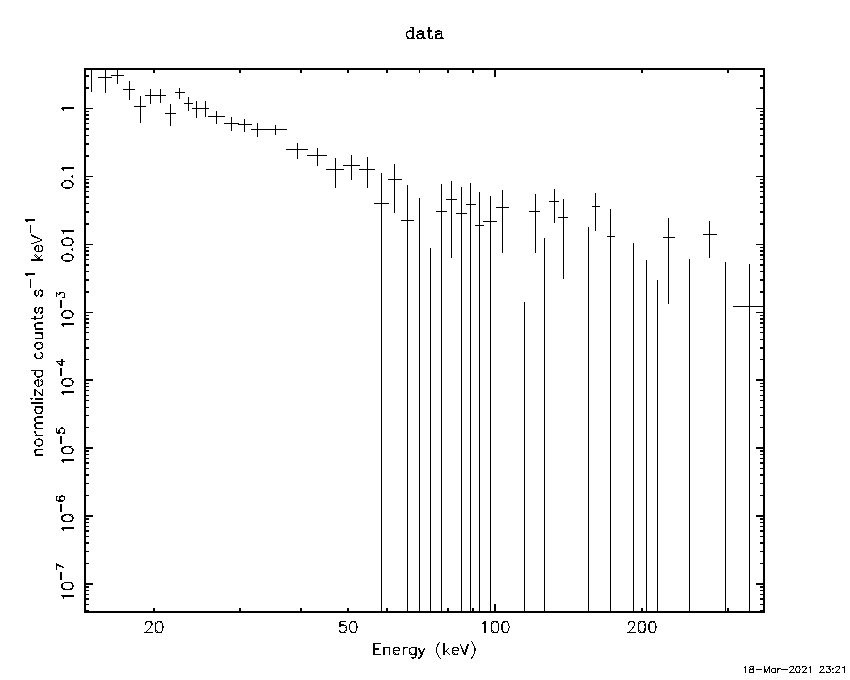

In [12]:
plot_spectrum(what='ldata', units='keV')

In [13]:
s.ignore('**-20.')
s.ignore('300.-**')

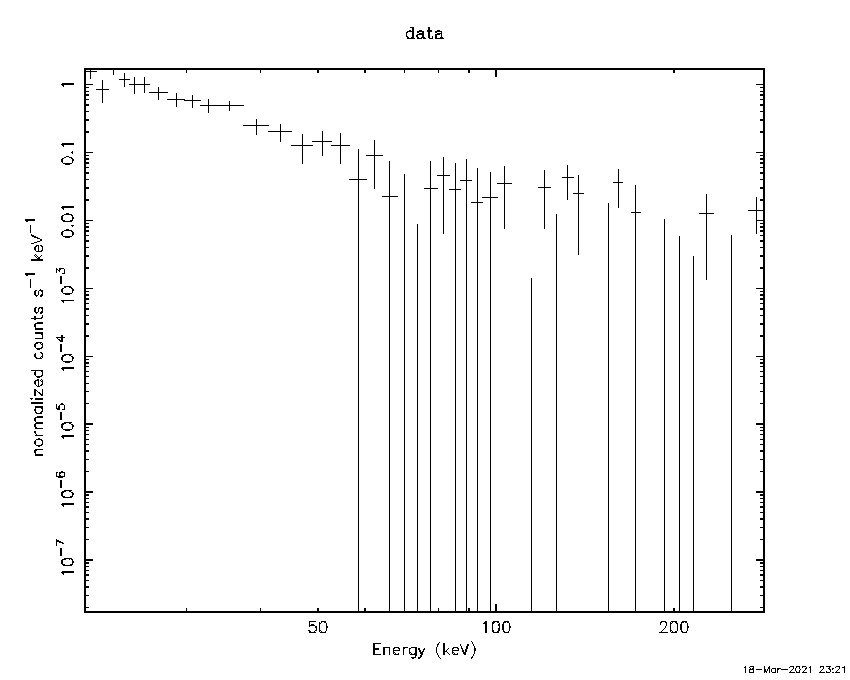

In [14]:
plot_spectrum(what='ldata', units='keV')

In [15]:
s.notice('all')
xsp.AllData.ignore('bad')
s.noticed

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62]

In [37]:
# Define a model
m = xsp.Model('wabs*po')

In [38]:
print_model(m)

component par name value  units error   step     min      max    frozen
--------- -------- ------ ----- ------ ------ --------- -------- ------
     wabs       nH 1.0000 10^22 0.0000 0.0100  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 1.0000       0.0000 0.0100 -3.00e+00 9.00e+00  False
 powerlaw     norm 1.0000       0.0000 0.0100  0.00e+00 1.00e+20  False


In [18]:
# Component objects are accessible-by-name as Model object attributes:
comp1 = m.wabs
comp2 = m.powerlaw
# Parameter objects are accessible-by-name as Component object attributes:
par1 = m.wabs.nH
par2 = m.powerlaw.PhoIndex
# ...and we can modify their values:
par2.values = 2.0
m.wabs.nH = 1.5
comp2.norm = 3.0

# Can also get a Parameter object directly from a Model, without going
# through a Component.  Just pass the Model the Parameter index number:
par3 = m(3)

In [19]:
print_model(m)

component par name value  units error   step     min      max    frozen
--------- -------- ------ ----- ------ ------ --------- -------- ------
     wabs       nH 1.5000 10^22 0.0000 0.0150  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 2.0000       0.0000 0.0200 -3.00e+00 9.00e+00  False
 powerlaw     norm 3.0000       0.0000 0.0300  0.00e+00 1.00e+20  False


In [20]:
# Or you can use the 'setPars' method to change the value of a parameter
# model.setPars({nPar:value})
m.setPars({2:1.7}) # 

In [21]:
print_model(m)

component par name value  units error   step     min      max    frozen
--------- -------- ------ ----- ------ ------ --------- -------- ------
     wabs       nH 1.5000 10^22 0.0000 0.0150  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 1.7000       0.0000 0.0170 -3.00e+00 9.00e+00  False
 powerlaw     norm 3.0000       0.0000 0.0300  0.00e+00 1.00e+20  False


In [22]:
# If you want to change e.g. the 'step' or 'boundary' you must use a list of 6 floats: [value, fit delta, min, bot, top, max]
m.powerlaw.PhoIndex.values = [1.0, 0.01, -4.0, -3.0, 6.0, 7.0]

In [23]:
print_model(m)

component par name value  units error   step     min      max    frozen
--------- -------- ------ ----- ------ ------ --------- -------- ------
     wabs       nH 1.5000 10^22 0.0000 0.0150  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 1.0000       0.0000 0.0100 -4.00e+00 6.00e+00  False
 powerlaw     norm 3.0000       0.0000 0.0300  0.00e+00 1.00e+20  False


In [24]:
# To free / freeze a parameter:
par2.frozen = False
par3.frozen = True

In [25]:
print_model(m)

component par name value  units error    step     min      max    frozen
--------- -------- ------ ----- ------ ------- --------- -------- ------
     wabs       nH 1.5000 10^22 0.0000  0.0150  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 1.0000       0.0000  0.0100 -4.00e+00 6.00e+00  False
 powerlaw     norm 3.0000       0.0000 -0.0300  0.00e+00 1.00e+20   True


In [26]:
par1.link = "3.3 * 2" # Link par 1 to par 2 with a multiplicative constant 3.3
par1.link = "" # Removes the link.
par1.untie()   # Also removes the link.

In [27]:
print_model(m)

component par name value  units error    step     min      max    frozen
--------- -------- ------ ----- ------ ------- --------- -------- ------
     wabs       nH 3.3000 10^22 0.0000  0.0330  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 1.0000       0.0000  0.0100 -4.00e+00 6.00e+00  False
 powerlaw     norm 3.0000       0.0000 -0.0300  0.00e+00 1.00e+20   True


In [39]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

In [40]:
print_model(m)

component par name value  units  error   step     min      max    frozen
--------- -------- ------ ----- ------- ------ --------- -------- ------
     wabs       nH 0.0000 10^22 -1.0000 0.0000  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 2.7729        0.1564 0.0277 -3.00e+00 9.00e+00  False
 powerlaw     norm 6.7698        3.5186 0.0677  0.00e+00 1.00e+20  False


In [41]:
chi2_red, chi2, ndof =get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

('chi_red', 1.1289514226183408)
('chi', 65.47918251186377)
('ndof', 58)


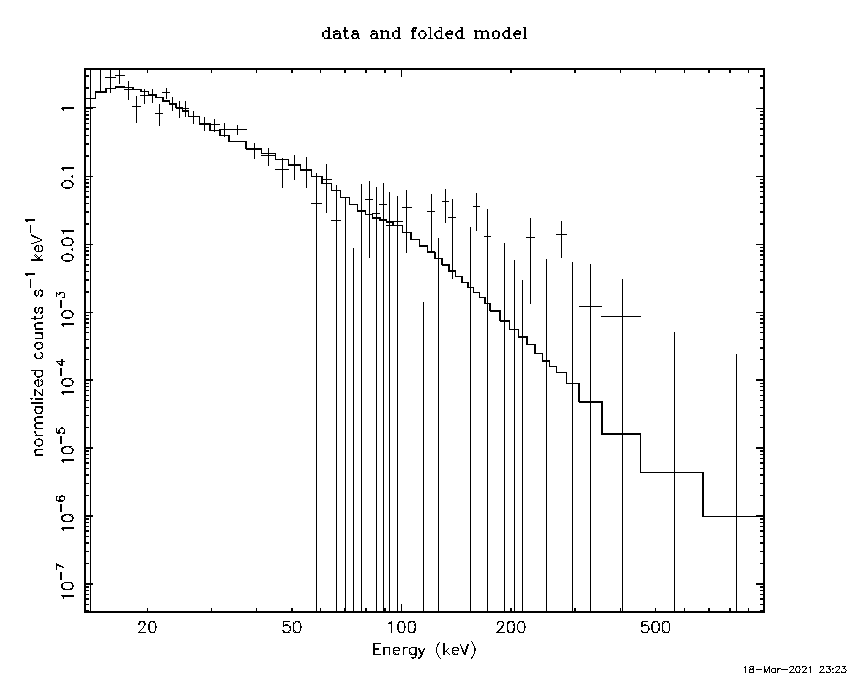

In [42]:
plot_spectrum(what='ldata', units='keV')

In [43]:
print_model(m)

component par name value  units  error   step     min      max    frozen
--------- -------- ------ ----- ------- ------ --------- -------- ------
     wabs       nH 0.0000 10^22 -1.0000 0.0000  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 2.7729        0.1564 0.0277 -3.00e+00 9.00e+00  False
 powerlaw     norm 6.7698        3.5186 0.0677  0.00e+00 1.00e+20  False


In [44]:
# Step parameter 3 from 1.5 to 2.5 in 10 linear steps
xsp.Fit.steppar("2 1.7 3.7 10")
step2 = xsp.Fit.stepparResults('delstat')
xsp.Fit.steppar("3 0.6 60. 10")
step3 = xsp.Fit.stepparResults('delstat')

# Repeat the above but with logarithmic steps
#xsp.Fit.steppar("log")
# Step parameter 2 linearly from -.2 to .2 in steps of .02
#xsp.Fit.steppar("nolog 2 -.2 .2 20")

In [45]:
step3

[27.00300177,
 0.004887634285,
 1.513533816,
 3.933290508,
 6.291263822,
 8.459460892,
 10.43567491,
 12.24092164,
 13.89831986,
 15.4284098,
 16.84846401]

In [70]:
# Create and open a log file for XSPEC output
# This returns a Python file object
logFile = xsp.Xset.openLog("newLogFile.txt")

# commands with desired output:
xsp.Fit.show()
m.show()

# Get the Python file object for the currently opened log
logFile = xsp.Xset.log
# Close XSPEC's currently opened log file.
xsp.Xset.closeLog()

In [71]:
less newLogFile.txt

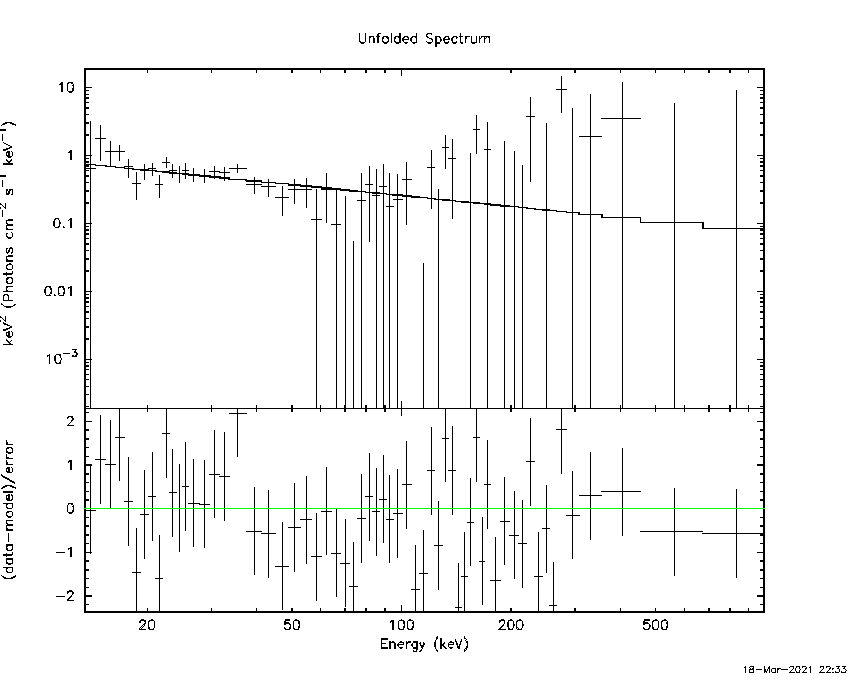

In [34]:
plot_spectrum(what='eeuf delchi', units='keV')

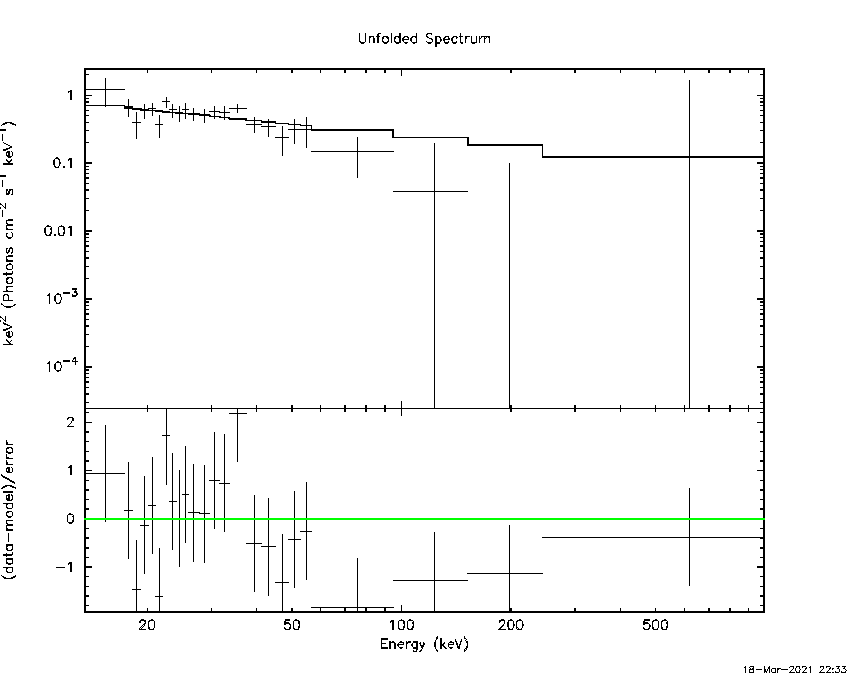

In [33]:
plot_spectrum(what='eeuf delchi', units='keV', minSig=2, maxBins=10)

In [66]:
# 'AllModels' is a container for all models
# 'AllData' is a container for all data
xsp.AllModels.calcFlux("50. 100.")
s1 = xsp.AllData(1)
s1.flux

(2.8308584446727785e-10, 0.0, 0.0, 0.002627428141527263, 0.0, 0.0)

In [67]:
# Luminosity(enMin, enMax, redshift)
xsp.AllModels.calcLumin("50. 100. .05")
s1 = xsp.AllData(1)
s1.lumin

(17.4028002217295, 0.0, 0.0, 0.002864845411424874, 0.0, 0.0)

In [68]:
#Estimate the 90% confidence range for the 2nd parameter
xsp.Fit.error("2.706 2")
par2 = xsp.AllModels(1)(2)
par2.error

(2.539904415825508, 3.0249329833074383, 'FFFFFFFFF')

In [73]:
#Estimate the 90% confidence range for the 2nd parameter
xsp.Fit.error("1. 2")
par2 = xsp.AllModels(1)(2)
par2.error

(2.887005094813406, 3.681513749250193, 'FFFFFFFFF')

# Load another spectra (NGC 7582)

In [109]:
cd data

/home/jovyan/examples/data


In [110]:
xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

s = xsp.Spectrum('nu_ngc7582_sr-30.pha')
#s.response = 'data/rmf.fits'
#s.response.arf = 'data/arf.fits'

#s.ignore('**-15')
#s.ignore('300-**')
xsp.AllData.ignore('bad')

# Try to fit first with a simple powlaw
m = xsp.Model('po')

In [111]:
print_model(m)

component par name value  units error   step     min      max    frozen
--------- -------- ------ ----- ------ ------ --------- -------- ------
 powerlaw PhoIndex 1.0000       0.0000 0.0100 -3.00e+00 9.00e+00  False
 powerlaw     norm 1.0000       0.0000 0.0100  0.00e+00 1.00e+20  False


In [112]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

In [113]:
print_model(m)

component par name value  units error   step     min      max    frozen
--------- -------- ------ ----- ------ ------ --------- -------- ------
 powerlaw PhoIndex 0.8554       0.0090 0.0086 -3.00e+00 9.00e+00  False
 powerlaw     norm 0.0007       0.0000 0.0000  0.00e+00 1.00e+20  False


In [114]:
chi2_red, chi2, ndof = get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

('chi_red', 4.582694451648844)
('chi', 2273.0164480178264)
('ndof', 496)


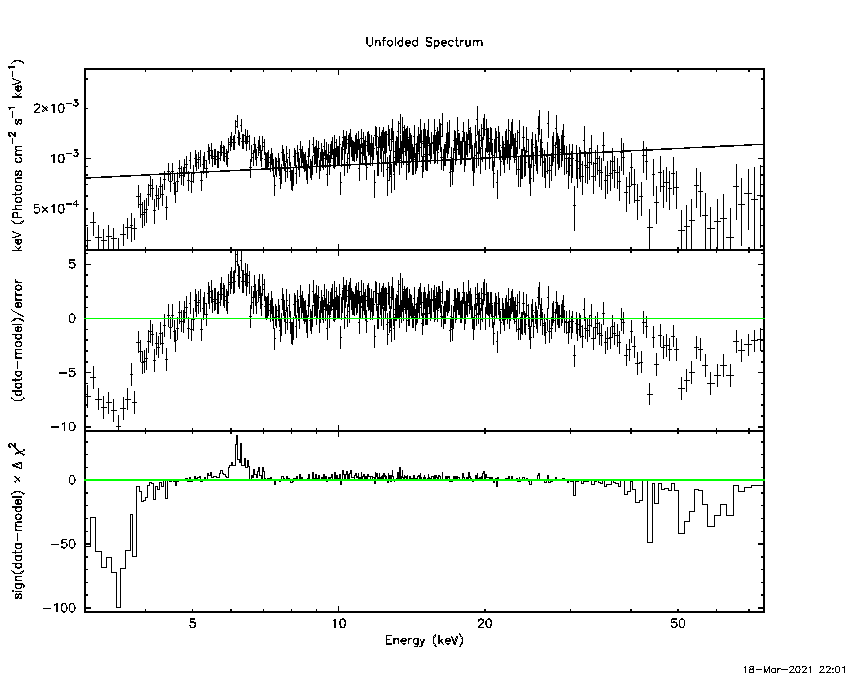

In [115]:
plot_spectrum("euf del chisq")

In [116]:
xsp.AllModels.clear()
# Add then the absorption
m = xsp.Model('wabs*po')

 List of Xspec models:
 https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/Models.html

In [117]:
print_model(m)

component par name value  units error   step     min      max    frozen
--------- -------- ------ ----- ------ ------ --------- -------- ------
     wabs       nH 1.0000 10^22 0.0000 0.0100  0.00e+00 1.00e+05  False
 powerlaw PhoIndex 1.0000       0.0000 0.0100 -3.00e+00 9.00e+00  False
 powerlaw     norm 1.0000       0.0000 0.0100  0.00e+00 1.00e+20  False


In [118]:
m.componentNames

['wabs', 'powerlaw']

In [119]:
# Component objects are accessible-by-name as Model object attributes:
comp1 = m.wabs
comp2 = m.powerlaw

In [120]:
comp1.parameterNames

['nH']

In [121]:
comp2.parameterNames

['PhoIndex', 'norm']

In [122]:
# Parameter objects are accessible-by-name as Component object attributes:
par3 = comp2.norm

In [123]:
# value, fit delta, min, bot, top, max
par3.values

[1.0, 0.01, 0.0, 0.0, 1e+20, 1e+24]

In [126]:
# ...and we can modify their values:
par3.values = 0.003
m.wabs.nH = 20
comp2.PhoIndex = 1.5

In [127]:
print_model(m)

component par name  value  units error   step     min      max    frozen
--------- -------- ------- ----- ------ ------ --------- -------- ------
     wabs       nH 20.0000 10^22 0.0000 0.2000  0.00e+00 1.00e+05  False
 powerlaw PhoIndex  1.5000       0.0000 0.0150 -3.00e+00 9.00e+00  False
 powerlaw     norm  0.0030       0.0000 0.0000  0.00e+00 1.00e+20  False


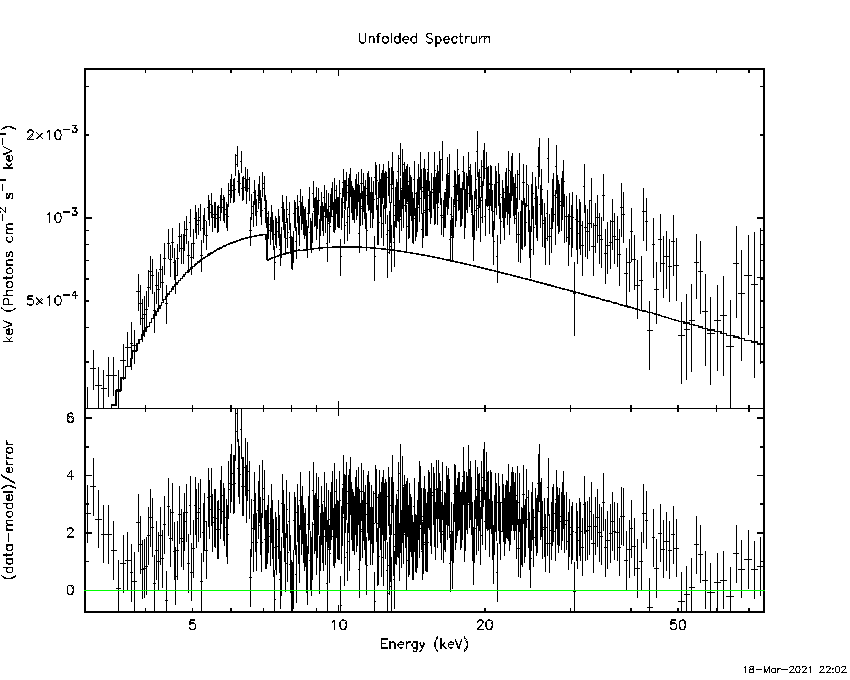

In [128]:
plot_spectrum()

In [129]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

chi2_red, chi2, ndof = get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

('chi_red', 1.3621702702889635)
('chi', 674.274283793037)
('ndof', 495)


In [130]:
print_model(m)

component par name  value  units error   step     min      max    frozen
--------- -------- ------- ----- ------ ------ --------- -------- ------
     wabs       nH 21.0896 10^22 0.7457 0.2109  0.00e+00 1.00e+05  False
 powerlaw PhoIndex  1.3705       0.0188 0.0137 -3.00e+00 9.00e+00  False
 powerlaw     norm  0.0032       0.0002 0.0000  0.00e+00 1.00e+20  False


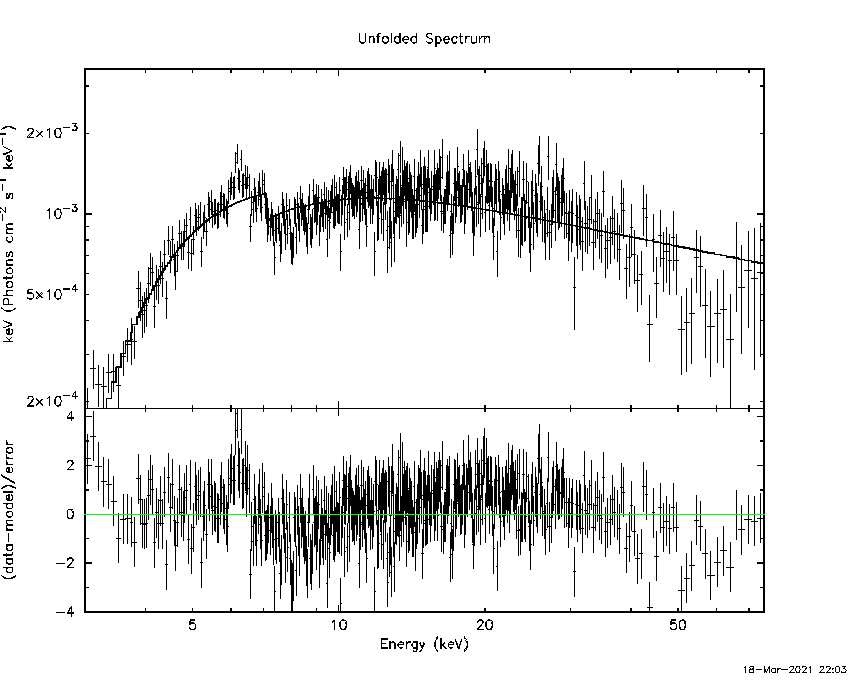

In [131]:
plot_spectrum()

In [133]:
xsp.AllModels.clear()
# Use a more appropriate model
m = xsp.Model('zphabs*(pexrav)')

In [134]:
print_model(m)

component par name  value   units error    step     min      max    frozen
--------- -------- -------- ----- ------ ------- --------- -------- ------
   zphabs       nH   1.0000 10^22 0.0000  0.0100  0.00e+00 1.00e+05  False
   zphabs Redshift   0.0000       0.0000 -0.0100 -9.99e-01 1.00e+01   True
   pexrav PhoIndex   2.0000       0.0000  0.0200 -1.00e+01 9.00e+00  False
   pexrav    foldE 100.0000   keV 0.0000  1.0000  1.00e+00 1.00e+06  False
   pexrav rel_refl   0.0000       0.0000  0.0100  0.00e+00 1.00e+06  False
   pexrav Redshift   0.0000       0.0000 -0.0100 -9.99e-01 1.00e+01   True
   pexrav    abund   1.0000       0.0000 -0.0100  0.00e+00 1.00e+06   True
   pexrav Fe_abund   1.0000       0.0000 -0.0100  0.00e+00 1.00e+06   True
   pexrav  cosIncl   0.4500       0.0000 -0.0045  5.00e-02 9.50e-01   True
   pexrav     norm   1.0000       0.0000  0.0100  0.00e+00 1.00e+20  False


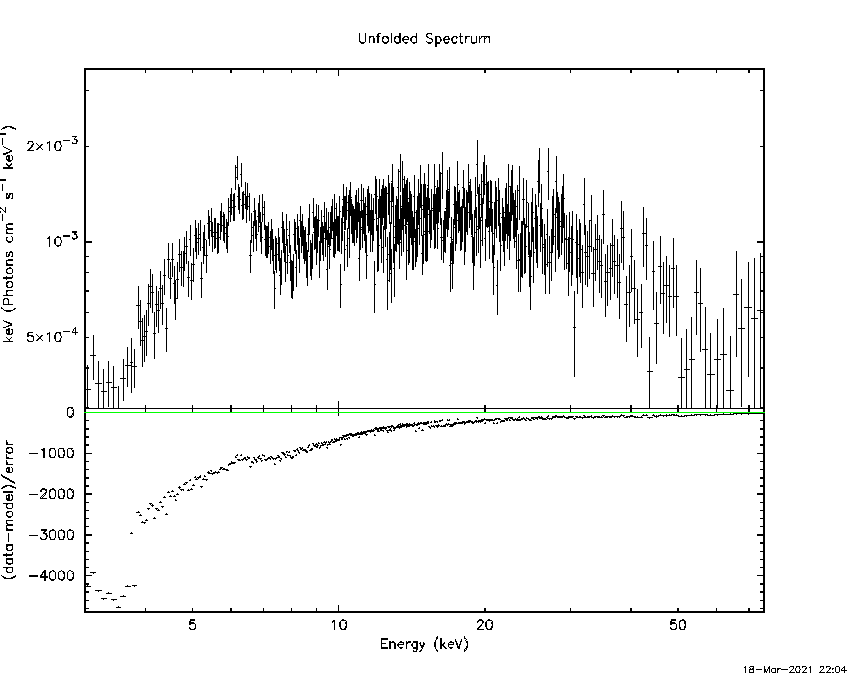

In [135]:
plot_spectrum()

In [136]:
xsp.Fit.renorm()

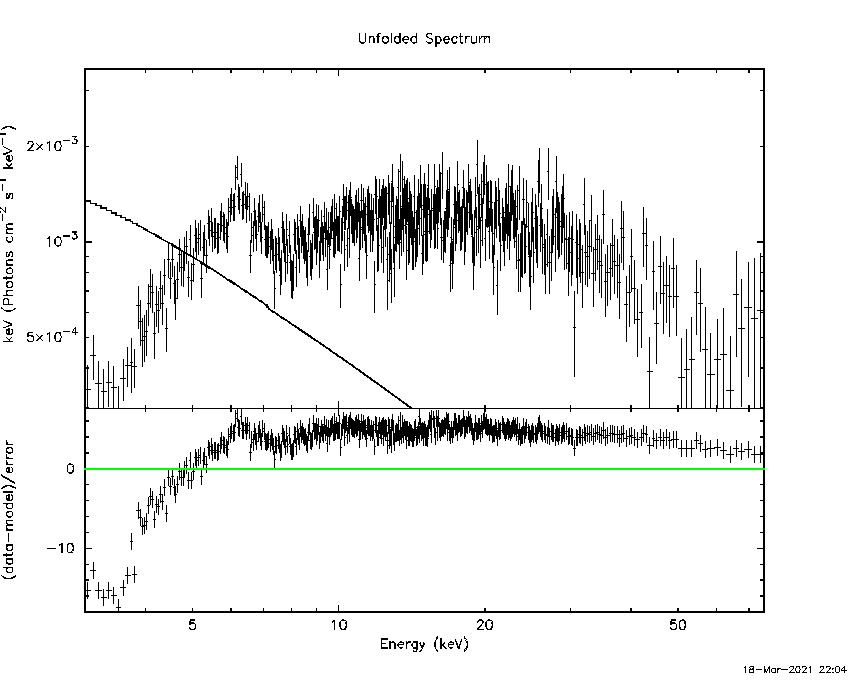

In [137]:
plot_spectrum()

In [138]:
print_model(m)

component par name  value   units error    step     min      max    frozen
--------- -------- -------- ----- ------ ------- --------- -------- ------
   zphabs       nH   1.0000 10^22 0.0000  0.0100  0.00e+00 1.00e+05  False
   zphabs Redshift   0.0000       0.0000 -0.0100 -9.99e-01 1.00e+01   True
   pexrav PhoIndex   2.0000       0.0000  0.0200 -1.00e+01 9.00e+00  False
   pexrav    foldE 100.0000   keV 0.0000  1.0000  1.00e+00 1.00e+06  False
   pexrav rel_refl   0.0000       0.0000  0.0100  0.00e+00 1.00e+06  False
   pexrav Redshift   0.0000       0.0000 -0.0100 -9.99e-01 1.00e+01   True
   pexrav    abund   1.0000       0.0000 -0.0100  0.00e+00 1.00e+06   True
   pexrav Fe_abund   1.0000       0.0000 -0.0100  0.00e+00 1.00e+06   True
   pexrav  cosIncl   0.4500       0.0000 -0.0045  5.00e-02 9.50e-01   True
   pexrav     norm   0.0048       0.0000  0.0000  0.00e+00 1.00e+20  False


In [147]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

chi2_red, chi2, ndof = get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

('chi_red', 1.0648930488681256)
('chi', 524.9922730919859)
('ndof', 493)


In [152]:
print_model(m)

component par name  value   units  error    step     min      max    frozen
--------- -------- -------- ----- ------- ------- --------- -------- ------
   zphabs       nH  21.9383 10^22  1.0421  0.2194  0.00e+00 1.00e+05  False
   zphabs Redshift   0.0000        0.0000 -0.0100 -9.99e-01 1.00e+01   True
   pexrav PhoIndex   1.6222        0.0821  0.0162 -1.00e+01 9.00e+00  False
   pexrav    foldE 126.1213   keV 38.9513  1.2612  1.00e+00 1.00e+06  False
   pexrav rel_refl   1.5621        0.2953  0.0156  0.00e+00 1.00e+06  False
   pexrav Redshift   0.0000        0.0000 -0.0100 -9.99e-01 1.00e+01   True
   pexrav    abund   1.0000        0.0000 -0.0100  0.00e+00 1.00e+06   True
   pexrav Fe_abund   1.0000        0.0000 -0.0100  0.00e+00 1.00e+06   True
   pexrav  cosIncl   0.4500        0.0000 -0.0045  5.00e-02 9.50e-01   True
   pexrav     norm   0.0051        0.0008  0.0001  0.00e+00 1.00e+20  False


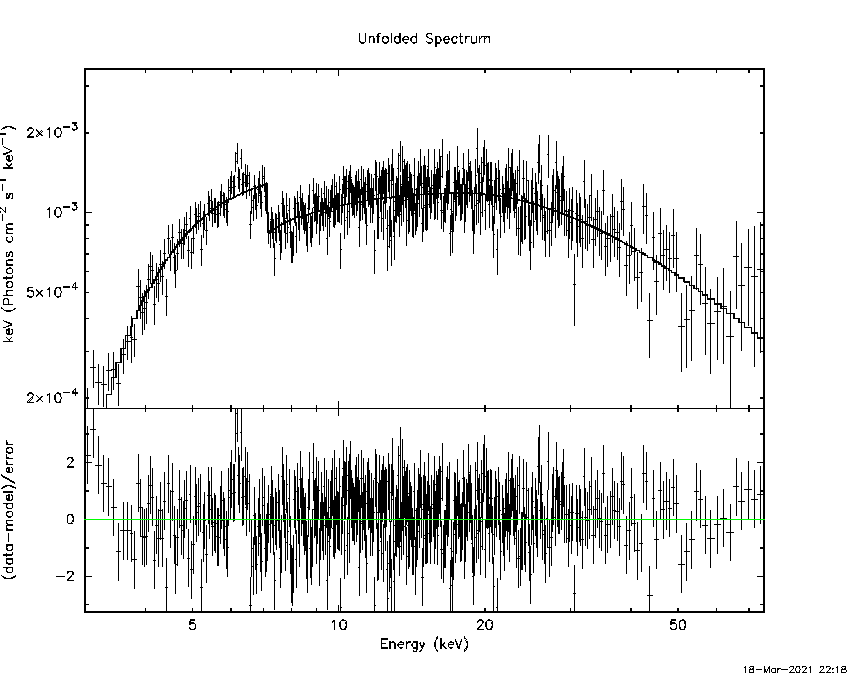

In [163]:
p = plot_spectrum()

In [170]:
xVals = p.x()
yVals = p.y()
#yVals2 = p.y(2)  # Gets values for data in the second plot group
modVals = p.model()
# Retrieve error arrays
xErrs = p.xErr()
yErrs = p.yErr()

In [172]:
yErrs

[0.0016102597645295215,
 0.0018544799011323261,
 0.0017582623669814028,
 0.0017575590859740834,
 0.0018780091660676474,
 0.0018551519648844468,
 0.001826246262229346,
 0.0019639851926681728,
 0.0020894260723216484,
 0.0030272731808933897,
 0.0021234886086344534,
 0.003694253274737741,
 0.0035889572010420643,
 0.003385324779190536,
 0.0033750838164285247,
 0.003457645233871897,
 0.003889370454289095,
 0.004096339847918755,
 0.00402443778317218,
 0.0035466565959489382,
 0.003881734133068003,
 0.0038070335023689564,
 0.00412942727330737,
 0.0039166349505299685,
 0.0043294952352130696,
 0.0036184859535346578,
 0.004579447220778292,
 0.004332920529754561,
 0.004611213201252533,
 0.004304846360407853,
 0.004065416531843111,
 0.004331779065852342,
 0.00470101865968352,
 0.004522851041633874,
 0.004522904958271234,
 0.004802545307806593,
 0.004883777070645458,
 0.004399784198820639,
 0.004994982156236903,
 0.004405400459124184,
 0.004617643320816084,
 0.005175004571272419,
 0.00496865854401862

In [ ]:
plot_spectrum("euf del chisq")

In [ ]:
# Finally use an appropriately more complex model
# m3 = xsp.Model('zphabs*(pexrav+zgauss)')

# Load another spectra (NGC 5548)

In [ ]:
xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

s = xsp.Spectrum("nu_ngc5548_obs1_sr-30.pha")